In [2]:
from datetime import datetime
from collections import defaultdict
import re
import pickle
import pandas as pd
from netCDF4 import Dataset, num2date #pylint: disable=no-name-in-module
import numpy as np
import numpy.ma as ma

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import scipy.optimize as opt
from scipy.stats import linregress
import seaborn as sn
import cmasher as cmr
import mpl_axes_aligner


# from SuPerSim.functions_summary import *
# from SuPerSim.pickling import get_all_stats

In [5]:
dir()

['Dataset',
 'In',
 'Out',
 'Rectangle',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'cmr',
 'datetime',
 'defaultdict',
 'exit',
 'get_ipython',
 'linregress',
 'ma',
 'matplotlib',
 'mpl_axes_aligner',
 'np',
 'num2date',
 'open',
 'opt',
 'pd',
 'pickle',
 'plt',
 'quit',
 're',
 'sn']

In [4]:
from src.yearlystats import plot_box_yearly_stat

ModuleNotFoundError: No module named 'mytime'

In [2]:
path_forcing_merra2 = '/home/vpo001/storage/Caucasus/Aksaut/old_scaled/scaled_merra2_Aksaut.nc'
path_ground = '/home/vpo001/storage/Caucasus/Aksaut/niagara_results/North_spin_up/merra2/result_soil_temperature.nc'
path_snow = '/home/vpo001/storage/Caucasus/Aksaut/niagara_results/North_spin_up/merra2/result_snow_depth.nc'
path_swe = '/home/vpo001/storage/Caucasus/Aksaut/niagara_results/North_spin_up/merra2/result_swe.nc'
path_thaw_depth = '/home/vpo001/storage/Caucasus/Aksaut/niagara_results/North_spin_up/merra2/result_thaw_depth.nc'
path_repository = '/home/vpo001/storage/Caucasus/Aksaut/niagara_results/North_spin_up/merra2/folder_manifest.csv'
path_pickle = '/fs/yedoma/home/vpo001/VikScriptsTests/Python_Pickles/'
site = 'Aksaut_North_spin_up'
year_bkg_end = 2010
year_trans_end = 2023
forcing_list = ['merra2']
path_forcing_list = [path_forcing_merra2]
date_event = [2021, 12, 31]
topo_event = []
no_weight = True
consecutive = 7
glacier = False
min_glacier_depth = 100

In [3]:
df, reanalysis_stats, list_valid_sim, dict_melt_out, stats_melt_out_dic, df_stats, rockfall_values = get_all_stats(
    forcing_list, path_forcing_list, path_repository, path_ground, path_snow, path_pickle,
    year_bkg_end, year_trans_end, consecutive,
    site, date_event, topo_event,
    glacier, min_glacier_depth)

Succesfully opened the pre-existing pickle: df_Aksaut_North_spin_up.pkl
Succesfully opened the pre-existing pickle: reanalysis_stats_Aksaut_North_spin_up.pkl
Succesfully opened the pre-existing pickle: list_valid_sim_Aksaut_North_spin_up.pkl
Succesfully opened the pre-existing pickle: melt_out_Aksaut_North_spin_up.pkl
Succesfully opened the pre-existing pickle: df_stats_Aksaut_North_spin_up.pkl
Succesfully opened the pre-existing pickle: rockfall_values_Aksaut_North_spin_up.pkl


In [4]:
df, reanalysis_stats, list_valid_sim, dict_melt_out, stats_melt_out_dic, df_stats, rockfall_values = load_all_pickles(site, path_pickle)

The following plot is a histogram of the distribution of the statistical weights of all simulations:


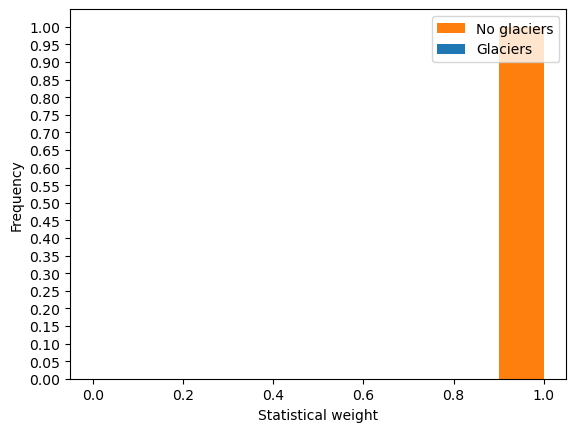

The following plot is a histogram of the distribution of glacier simulations wrt to altitude, aspect, slope, and forcing:
[24 24 24 24 24]
[120]
[40 40 40]
[120]


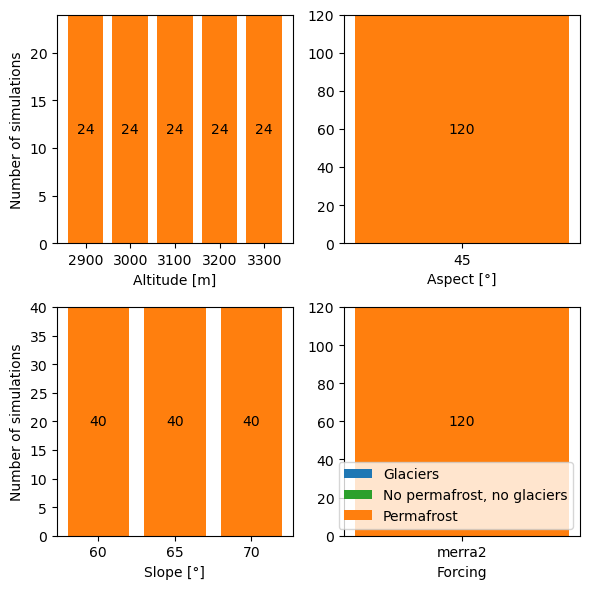

List of altitudes: [2900, 3000, 3100, 3200, 3300]
Altitude at which we plot the time series: 3100
Plots of the normalized distance of air and ground temperature, water production, and thaw_depth as a function of time
Granularity: week and month side by side


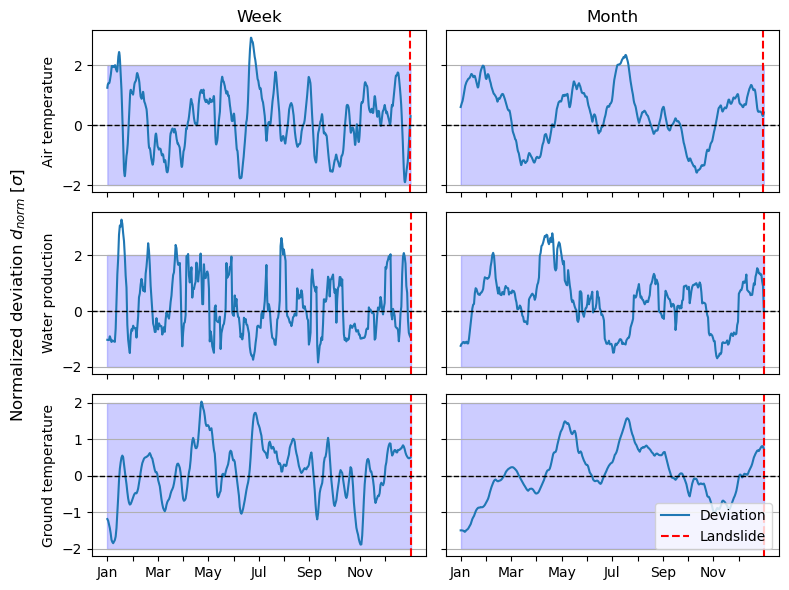

Granularity: year, plotted for all years


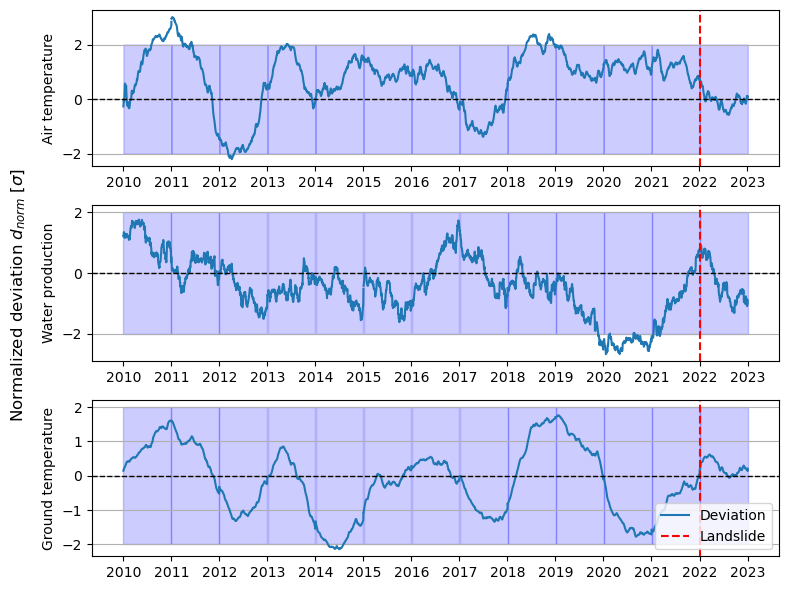

Yearly statistics for air and ground surface temperature, and also precipitation and water production


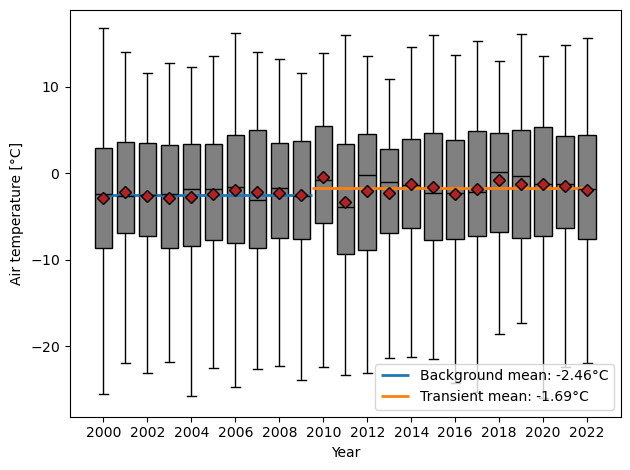

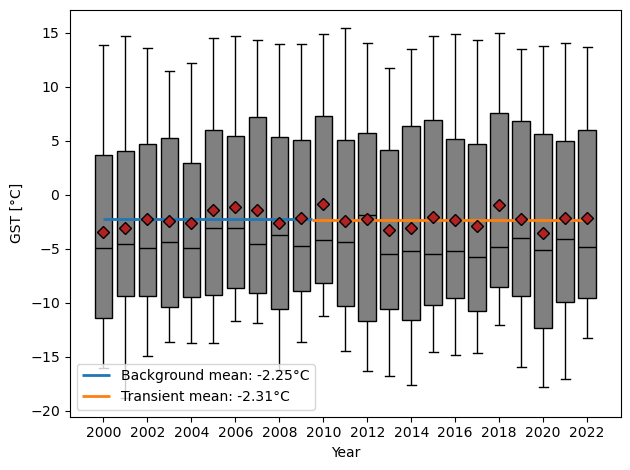

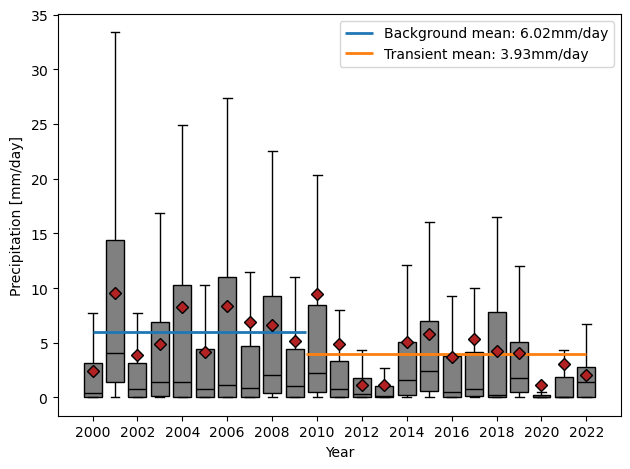

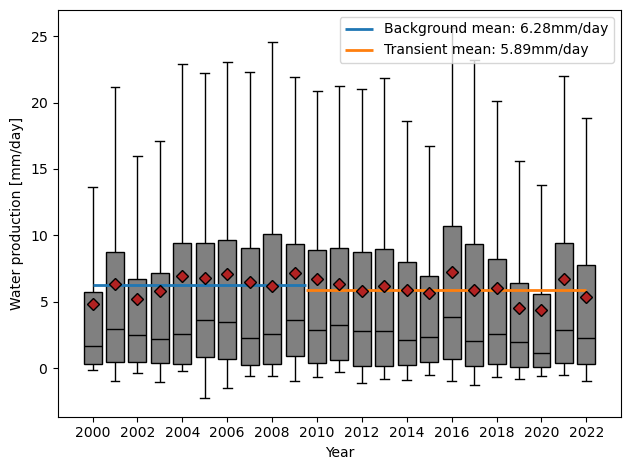

Heatmap of the background mean GST and its evolution as a function of aspect and slope at all altitudes


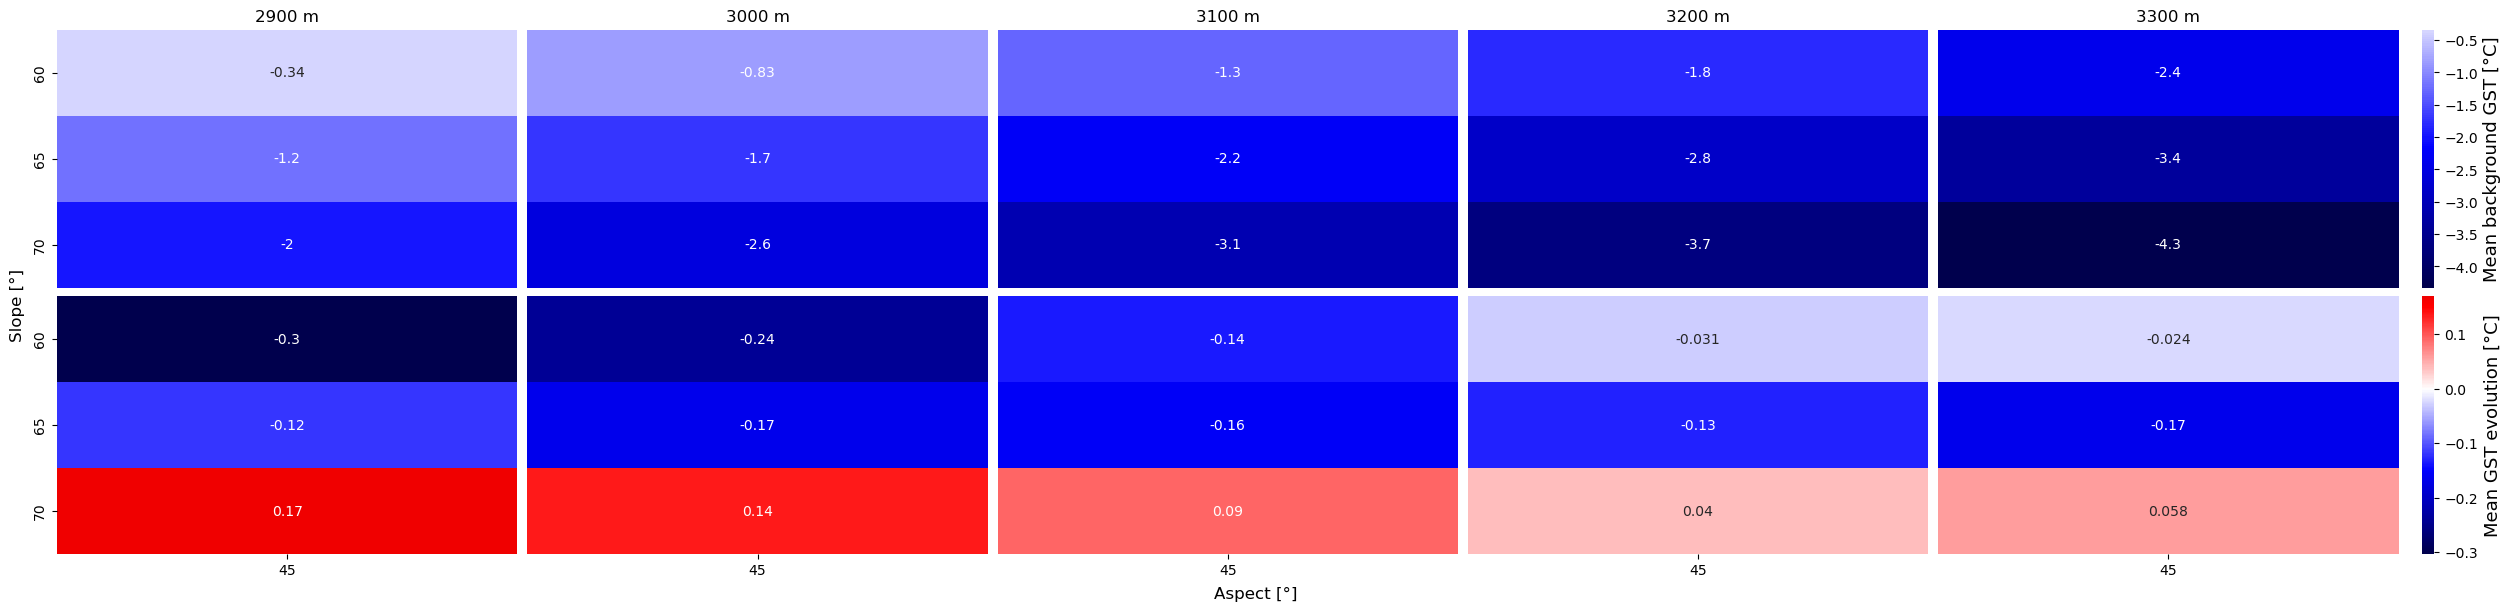

CDF of background, transient, and evolution GST:


<Figure size 640x480 with 0 Axes>

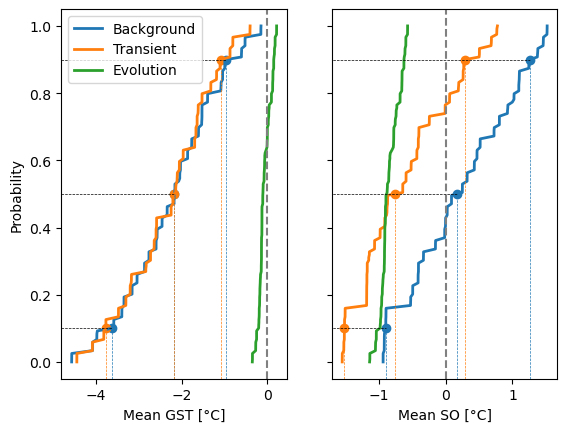

Heatmap of 10th, 25th, 50th, 75th, and 90th percentile in background and transient GST, and the difference:


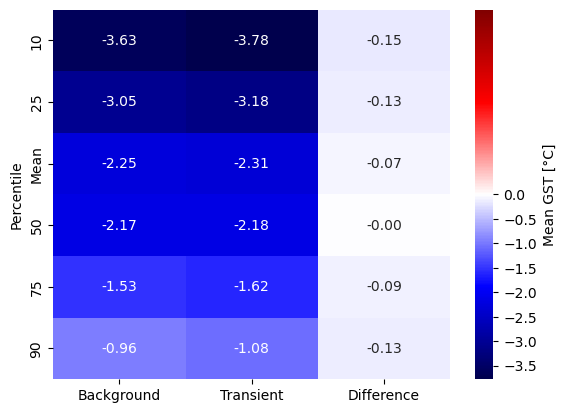

Plot of mean GST evolution vs background GST, with an emphasis on the 10% colder and warmer simulations


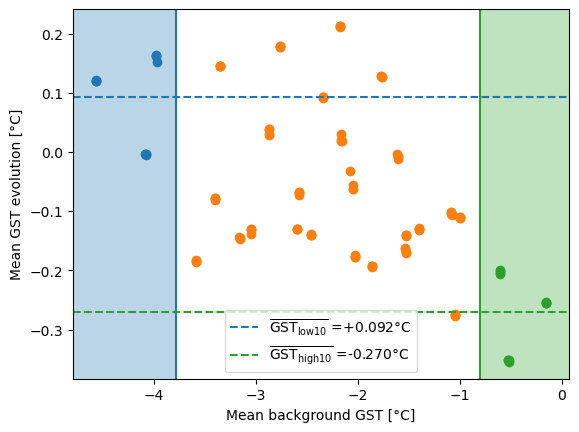

Plot of mean GST evolution vs background GST, fit, and binning per 10% quntiles
R-square: 0.3048476631187048 , regression slope: -0.07291949382935646 , regression intercept: -0.22914059325478403


/fs/yedoma/home/vpo001/VikScriptsTests/stat_summary_permafrost/evolution.py:70: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(list_x[low:up], list_y[low:up], c=color,s=0.8)
/fs/yedoma/home/vpo001/VikScriptsTests/stat_summary_permafrost/evolution.py:72: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.mean(list_x[low:up]), np.mean(list_y[low:up]), c=color, s=50)


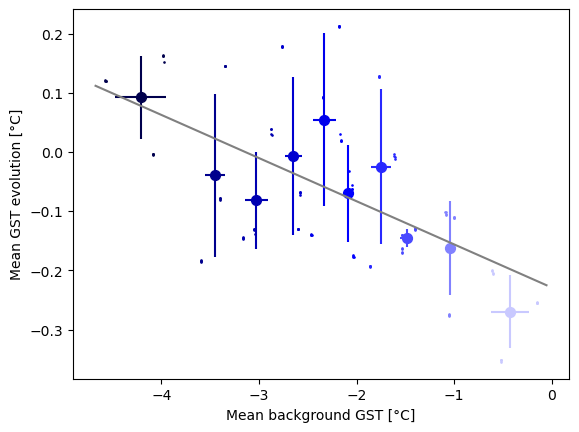

Scatter plot of mean background GST vs evolution of mean GST between the background and transient period
altitude: 2900 , R-square: 0.9751090769867683 , regression slope: -0.28763037126634444 , regression intercept: -0.4211484980862227
altitude: 3000 , R-square: 0.885296913644382 , regression slope: -0.21597254031112478 , regression intercept: -0.4561188257736083
altitude: 3100 , R-square: 0.652547084008527 , regression slope: -0.12288960258607266 , regression intercept: -0.3408912164163682
altitude: 3200 , R-square: 0.1430100308659412 , regression slope: -0.034926510954877955 , regression intercept: -0.137867146654092
altitude: 3300 , R-square: 0.12153511325661599 , regression slope: -0.04016026135827866 , regression intercept: -0.17852482430776642


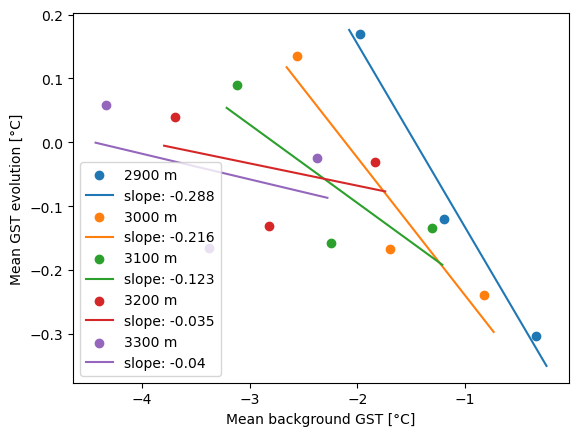

Parity plot (statistically-modeled vs numerically-simulated) of background mean GST:


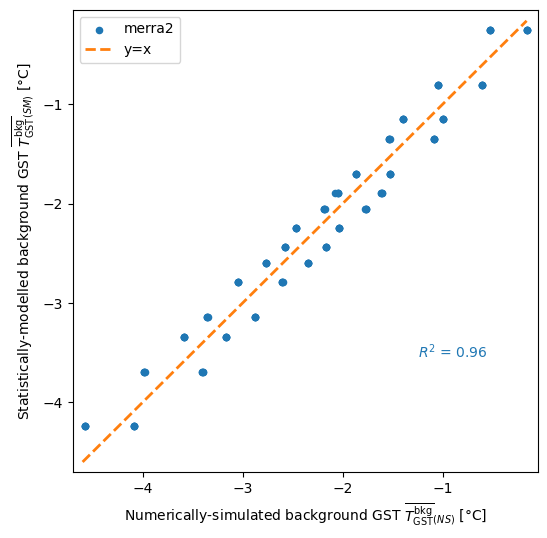

The coefficients of the statistical model for the mean background GST are given by:
  Coefficient       merra2
0      offset    -0.000005
1       c_alt     0.018152
2       d_alt  1116.698946
3       c_asp    -0.033398
4     c_slope    -0.179680
Plot of yearly statistics for atmospheric timeseries. Mean and several quantiles for each year:


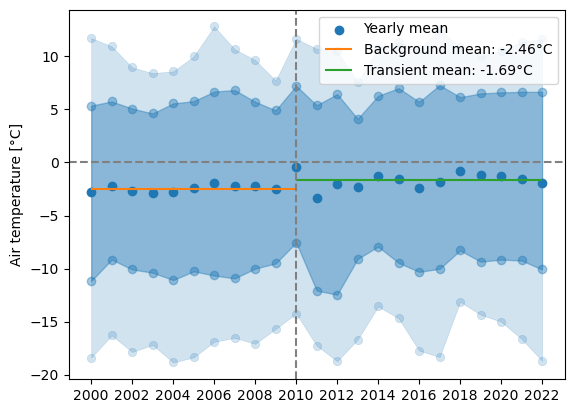

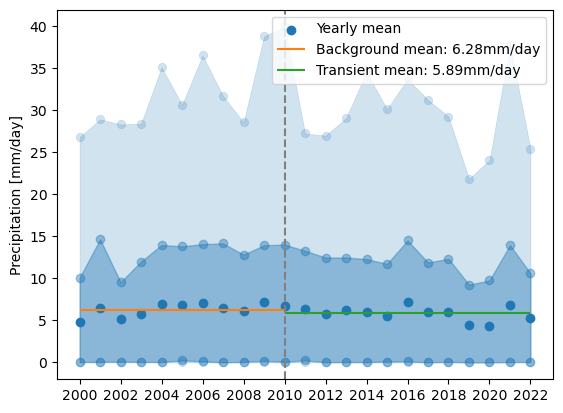

Plot of yearly statistics for simulated timeseries. Mean and several quantiles for each year:


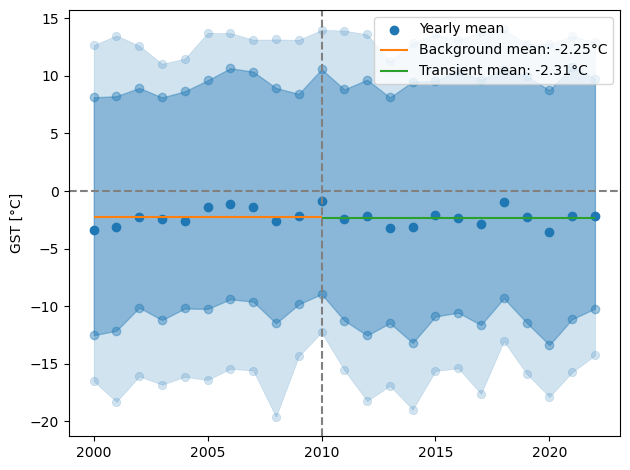

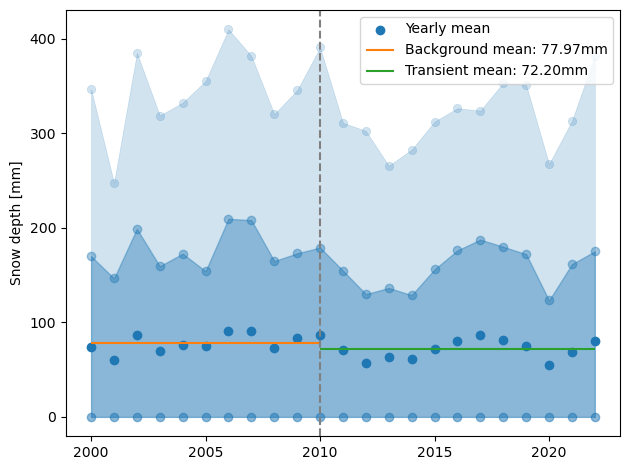

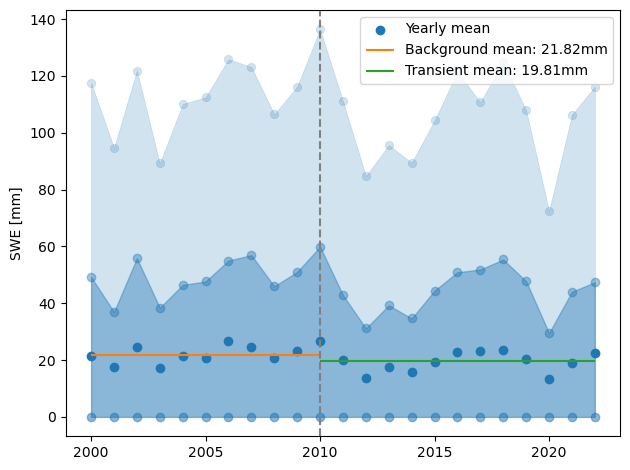

Histogram of the evolution of the snow cover (in days) and melt-out date:


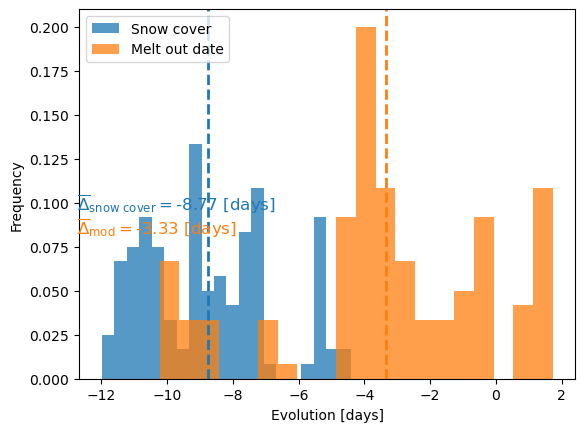

Plot of 2 timeseries reduced to a 1-year window with mean and 1- and 2-sigma spread:


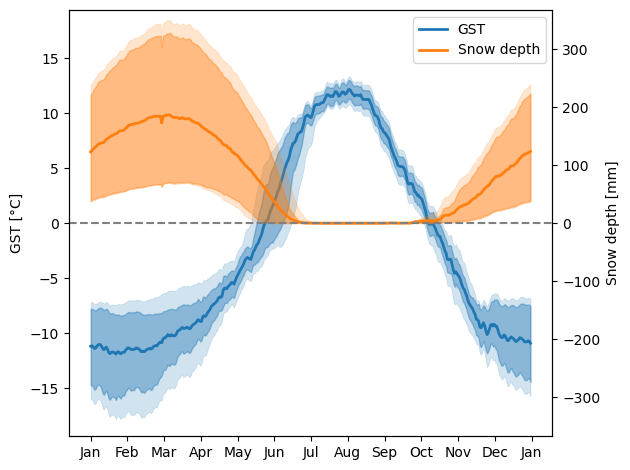

Plot of a single timeseries reduced to a 1-year window with mean and 1 and 2-sigma spread, for background and transient piods:


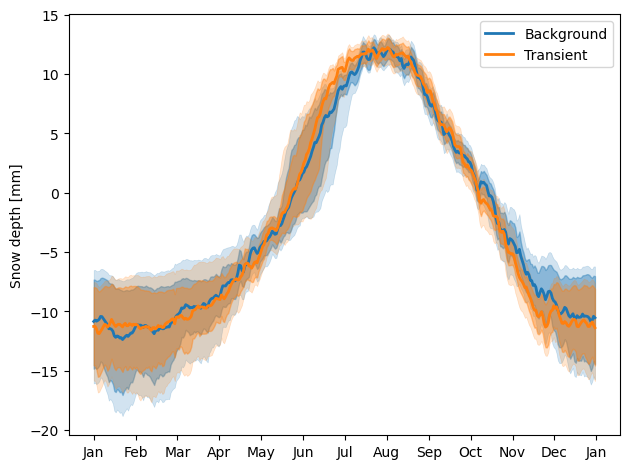

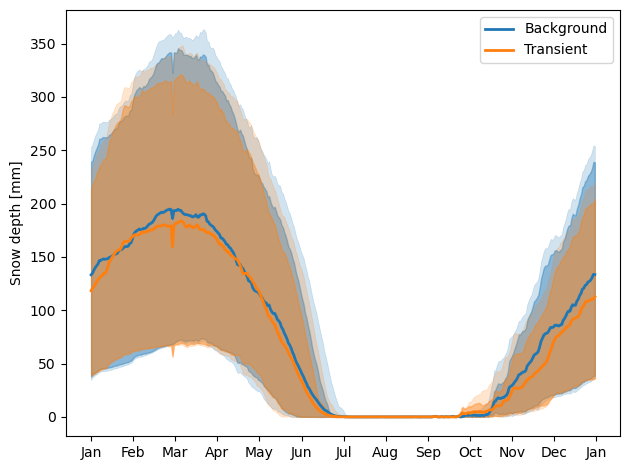

All done!


In [5]:
plot_all(site, forcing_list, path_forcing_list, path_ground, path_snow, path_swe, path_thaw_depth, path_pickle,
         year_bkg_end, year_trans_end, no_weight=True,
         individual_heatmap=False, polar_plots=False, parity_plot=True)